In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

# 1. Load dataset and  dentify some basic details of the dataset.

In [2]:
df = pd.read_csv(r'D:\ICT kerala\week10_preprocess\employee.csv')

In [3]:
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [4]:
df.tail()

,name,age,income,gender,department,grade,performance_score
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [6]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [7]:
df.shape

(9, 7)

In [8]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

# 2. Reset the index as "name" as the index.

In [9]:
df = pd.read_csv(r'D:\ICT kerala\week10_preprocess\employee.csv', index_col='name')

In [10]:
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [11]:
# selecting row for 'Jack Morgan'
df.loc['Jack Morgan']

age                     32.0
income               35000.0
gender                     M
department           Finance
grade                     G2
performance_score        674
Name: Jack Morgan, dtype: object

In [12]:
# selecting row for 'Josh Wills'
df.loc['Josh Wills']

age                     54.0
income               52000.0
gender                     F
department           Finance
grade                     G3
performance_score        901
Name: Josh Wills, dtype: object

# 4. Select data for multiple values "Sales" and “Finance”.

In [13]:
df[df['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score

In [14]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [15]:
df[(df['performance_score']>500) & (df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

In [16]:
df.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [17]:
df.isna().sum(axis=1)

name
Allen Smith      2
S Kumar          1
Jack Morgan      0
Ying Chin        0
Dheeraj Patel    0
Satyam Sharma    2
James Authur     1
Josh Wills       0
Leo Duck         0
dtype: int64

Since the data is very small in size,we can't drop the missing values. Instead we can impute using measures of central tendancy. 

3 colums have missing values: 'age' and 'income' being the numerical variables and 'gender' being the categorical variable. We can use mode to fill in the missing values of the 'gender' column.

In [18]:
df['gender'].mode()

0    F
dtype: object

In [19]:
df['gender'].fillna(df['gender'].mode, inplace=True)

In [20]:
df['gender'].isna().sum()

0

To fill in the numerical variables, we have to consider their skewness.

<AxesSubplot:xlabel='age', ylabel='Density'>

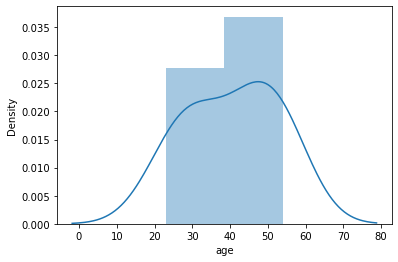

In [21]:
sns.distplot(df['age'])

<AxesSubplot:xlabel='age'>

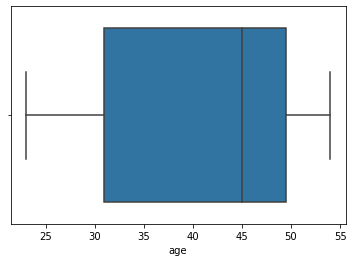

In [22]:
sns.boxplot(df['age'])

For 'age' the data is not skewed and has no outliers. We can use the median value for filling in the missing value here.

In [23]:
df['age'].fillna(value=df['age'].median(), axis=0, inplace=True)

In [24]:
df['age']

name
Allen Smith      45.0
S Kumar          45.0
Jack Morgan      32.0
Ying Chin        45.0
Dheeraj Patel    30.0
Satyam Sharma    45.0
James Authur     54.0
Josh Wills       54.0
Leo Duck         23.0
Name: age, dtype: float64

<AxesSubplot:xlabel='income', ylabel='Density'>

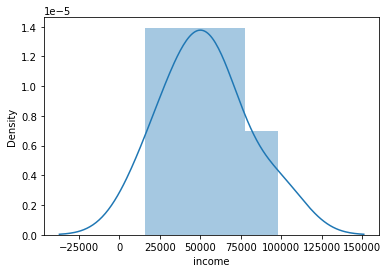

In [25]:
sns.distplot(df['income'])

<AxesSubplot:xlabel='income'>

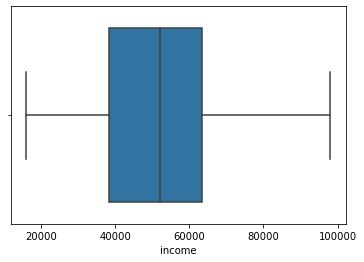

In [26]:
sns.boxplot(df['income'])

For 'income' variable also the data is not skewed and has no outliers so we can use the median value here for imputation

In [27]:
df['income'].fillna(value=df['income'].median(), axis=0, inplace=True)

In [28]:
df['income']

name
Allen Smith      52000.0
S Kumar          16000.0
Jack Morgan      35000.0
Ying Chin        65000.0
Dheeraj Patel    42000.0
Satyam Sharma    62000.0
James Authur     52000.0
Josh Wills       52000.0
Leo Duck         98000.0
Name: income, dtype: float64

In [29]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

There are no missing values in the data now.

# 8. Check the outliers and handle outliers in performance score using Percentiles

In [30]:
num_vars = df.select_dtypes(include=['int64','float'])

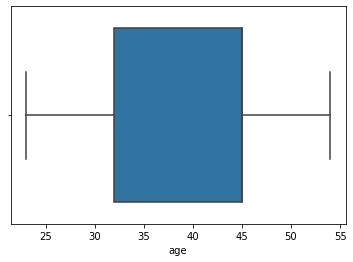

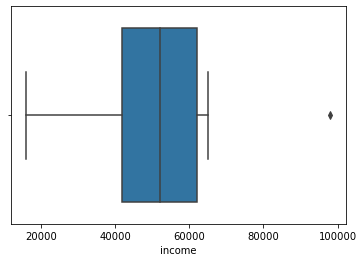

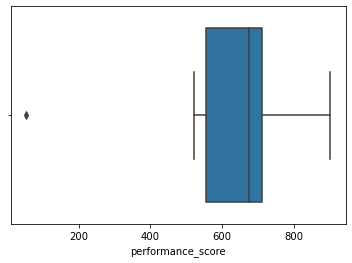

In [31]:
for x in num_vars:
    sns.boxplot(df[x])
    plt.show()

Both 'income' and 'performance score' variables are having outliers.

We can use percentiles for handling the outliers. We can replace the the values > 90th percentile with the 90th percentile and the values < 10th percentile with the 10th percentile.

In [32]:
# To find outthe outlier vaue we use the quartiles
q1_inc = np.percentile(df['income'], 25)
q3_inc = np.percentile(df['income'], 75)
iqr_inc = q3_inc - q1_inc
uplim_inc = q3_inc + (1.5*iqr_inc)
out_inc = df[df['income']>uplim_inc]
out_inc

,age,income,gender,department,grade,performance_score
name,,,,,,
Leo Duck,23.0,98000.0,M,Sales,G4,709


In [33]:
p90_inc = np.percentile(df['income'], 90)
df['income'].replace(98000, p90_inc, inplace=True)

<AxesSubplot:xlabel='income'>

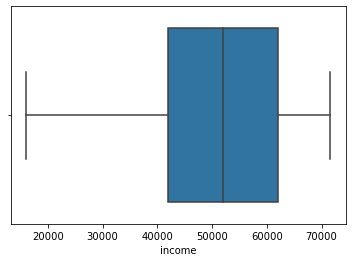

In [34]:
sns.boxplot(df['income'])

In [35]:
q1_p = np.percentile(df['performance_score'], 25)
q3_p = np.percentile(df['performance_score'], 75)
iqr_p = q3_p - q1_p
lowlim_p = q1_p - (1.5*iqr_p)
out_p = df[df['performance_score']<lowlim_p]
out_p

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


In [36]:
p10_p = np.percentile(df['performance_score'], 10)
df['performance_score'].replace(53, p10_p, inplace=True)

<AxesSubplot:xlabel='performance_score'>

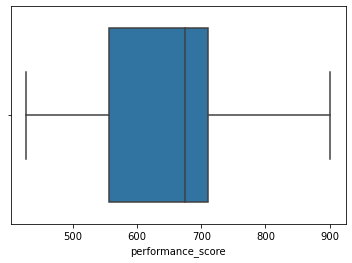

In [37]:
sns.boxplot(df['performance_score'])

# 9. Check the gender column and do Dummy encoding.

In [38]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True)

In [39]:
df['gender']

name
Allen Smith      0
S Kumar          1
Jack Morgan      0
Ying Chin        1
Dheeraj Patel    1
Satyam Sharma    0
James Authur     1
Josh Wills       1
Leo Duck         0
Name: gender, dtype: uint8

# 10. Do the standard scaling on the feature performance score

We have to apply encoding on 'department' and 'grade' variables, since they are categorical.

## Label encoding on 'grade'

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()

In [42]:
df['grade'] = le.fit_transform(df['grade'])

## One Hot Encoding on 'department'

In [43]:
df = pd.get_dummies(df, columns=['department'], drop_first=True)

In [44]:
df.head()

,age,income,gender,grade,performance_score,department_Operations,department_Sales
name,,,,,,,
Allen Smith,45.0,52000.0,0,2,723.0,1,0
S Kumar,45.0,16000.0,1,0,520.0,0,0
Jack Morgan,32.0,35000.0,0,1,674.0,0,0
Ying Chin,45.0,65000.0,1,2,556.0,0,1
Dheeraj Patel,30.0,42000.0,1,1,711.0,1,0


All the variables are now converted into numerical form.

Now we can build a model.

## Building model

In [45]:
x = df.drop(['performance_score'], axis=1)

In [46]:
y = df['performance_score']

Splitting the data into test and train datasets

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=142)

Building  linear regression model

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr_model = LinearRegression()

In [51]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [52]:
y_pred = lr_model.predict(x_test)

Checking the accuracy of the model

In [53]:
from sklearn.metrics import mean_squared_error

In [54]:
print('MSE is : ', mean_squared_error(y_test, y_pred))

MSE is :  103380.63902472547


In [55]:
from sklearn.metrics import r2_score

In [56]:
print('R Sq value is : ', r2_score(y_test, y_pred))

R Sq value is :  -0.8374259386619449


## Scaling the variable performance_score 

In [57]:
from sklearn import preprocessing

In [58]:
std = preprocessing.StandardScaler()

In [59]:
df[['performance_score']] = std.fit_transform(df[['performance_score']])

Now again we fit the model and check the effect of scaling.

In [60]:
x = df.drop(['performance_score'], axis=1)

In [61]:
y = df['performance_score']

In [62]:
x_train, x_test,y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=142)

In [63]:
lr_model.fit(x_train, y_train)

LinearRegression()

In [64]:
new_pred = lr_model.predict(x_test)

In [65]:
print('MSE is : ', mean_squared_error(y_test, new_pred))

MSE is :  6.1329280497749235


In [66]:
print('R Sq value is : ', r2_score(y_test, new_pred))

R Sq value is :  -0.8374259386619458


Mean square value has decreased but the R square value remains the same